In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [2]:
train_path = "color/train"
test_path = "color/test"
valid_path = "color/valid"

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___healthy','Strawberry___Leaf_scorch','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=20)
test_batches=ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___healthy','Strawberry___Leaf_scorch','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=2)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256), classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___healthy','Strawberry___Leaf_scorch','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=2)

Found 53736 images belonging to 38 classes.
Found 380 images belonging to 38 classes.
Found 200 images belonging to 38 classes.


# Plotting The Images

In [4]:
 def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
        if type(ims[0]) is np.ndarray:
            ims = np.array(ims).astype(np.uint8)
            if (ims.shape[-1] != 3):
                ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

C:\Users\HP ENVY\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


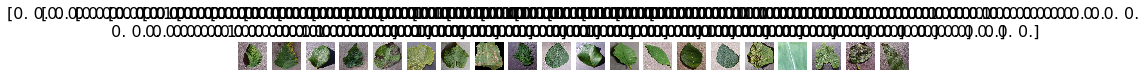

In [6]:
plots(imgs, titles=labels)

# Building And Training

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [9]:
model.add(Flatten())
model.add(Dense(45, activation='relu'))
model.add(Dense(38, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=10, validation_data=valid_batches, validation_steps=10, epochs=1000, verbose=2)

Epoch 1/1000
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10/10 - 27s - loss: 6.7652 - accuracy: 0.0500 - val_loss: 4.1288 - val_accuracy: 0.0000e+00
Epoch 2/1000
10/10 - 26s - loss: 3.5405 - accuracy: 0.1200 - val_loss: 3.7752 - val_accuracy: 0.0000e+00
Epoch 3/1000
10/10 - 26s - loss: 3.4303 - accuracy: 0.0900 - val_loss: 4.0306 - val_accuracy: 0.1000
Epoch 4/1000
10/10 - 26s - loss: 3.5013 - accuracy: 0.1200 - val_loss: 3.7095 - val_accuracy: 0.0000e+00
Epoch 5/1000
10/10 - 26s - loss: 3.3728 - accuracy: 0.1950 - val_loss: 3.7256 - val_accuracy: 0.0500
Epoch 6/1000
10/10 - 26s - loss: 3.3492 - accuracy: 0.1050 - val_loss: 3.8160 - val_accuracy: 0.0000e+00
Epoch 7/1000
10/10 - 26s - loss: 3.3481 - accuracy: 0.1200 - val_loss: 3.9165 - val_accuracy: 0.0500
Epoch 8/1000
10/10 - 26s - loss: 3.4078 - accuracy: 0.1050 - val_loss: 3.9706 - val_accuracy: 0.0500
Epoch 9/1000
10/10 - 26s - loss: 3.3066 - accuracy: 0.1750 - val_loss: 3.8836 - va

Epoch 79/1000
10/10 - 26s - loss: 1.9951 - accuracy: 0.4750 - val_loss: 3.0604 - val_accuracy: 0.3500
Epoch 80/1000
10/10 - 26s - loss: 1.6779 - accuracy: 0.5150 - val_loss: 2.6085 - val_accuracy: 0.1500
Epoch 81/1000
10/10 - 27s - loss: 1.9419 - accuracy: 0.4550 - val_loss: 2.6107 - val_accuracy: 0.2500
Epoch 82/1000
10/10 - 26s - loss: 1.9746 - accuracy: 0.4900 - val_loss: 2.7741 - val_accuracy: 0.2500
Epoch 83/1000
10/10 - 26s - loss: 1.7949 - accuracy: 0.4850 - val_loss: 3.2264 - val_accuracy: 0.3000
Epoch 84/1000
10/10 - 28s - loss: 2.1526 - accuracy: 0.4150 - val_loss: 2.6627 - val_accuracy: 0.3000
Epoch 85/1000
10/10 - 26s - loss: 2.2645 - accuracy: 0.3950 - val_loss: 2.5512 - val_accuracy: 0.1500
Epoch 86/1000
10/10 - 26s - loss: 2.1010 - accuracy: 0.4200 - val_loss: 2.2781 - val_accuracy: 0.4000
Epoch 87/1000
10/10 - 25s - loss: 1.9102 - accuracy: 0.4600 - val_loss: 2.3609 - val_accuracy: 0.3000
Epoch 88/1000
10/10 - 26s - loss: 1.7412 - accuracy: 0.5450 - val_loss: 2.1179 - v

Epoch 159/1000
10/10 - 25s - loss: 1.3466 - accuracy: 0.5800 - val_loss: 2.4843 - val_accuracy: 0.3500
Epoch 160/1000
10/10 - 25s - loss: 1.0063 - accuracy: 0.6900 - val_loss: 1.8239 - val_accuracy: 0.5000
Epoch 161/1000
10/10 - 25s - loss: 1.3521 - accuracy: 0.6150 - val_loss: 2.1656 - val_accuracy: 0.3500
Epoch 162/1000
10/10 - 25s - loss: 1.3360 - accuracy: 0.6100 - val_loss: 1.9660 - val_accuracy: 0.5000
Epoch 163/1000
10/10 - 25s - loss: 1.1582 - accuracy: 0.6550 - val_loss: 1.5335 - val_accuracy: 0.5500
Epoch 164/1000
10/10 - 25s - loss: 1.0188 - accuracy: 0.6850 - val_loss: 1.7773 - val_accuracy: 0.4000
Epoch 165/1000
10/10 - 25s - loss: 1.1198 - accuracy: 0.6600 - val_loss: 1.6739 - val_accuracy: 0.6500
Epoch 166/1000
10/10 - 25s - loss: 1.0409 - accuracy: 0.6650 - val_loss: 1.9549 - val_accuracy: 0.5000
Epoch 167/1000
10/10 - 25s - loss: 1.2121 - accuracy: 0.6650 - val_loss: 1.8479 - val_accuracy: 0.3500
Epoch 168/1000
10/10 - 25s - loss: 1.2310 - accuracy: 0.6350 - val_loss: 

Epoch 239/1000
10/10 - 25s - loss: 0.9413 - accuracy: 0.7450 - val_loss: 1.1533 - val_accuracy: 0.5000
Epoch 240/1000
10/10 - 25s - loss: 0.7339 - accuracy: 0.7600 - val_loss: 2.0886 - val_accuracy: 0.3500
Epoch 241/1000
10/10 - 25s - loss: 0.9798 - accuracy: 0.6800 - val_loss: 1.4611 - val_accuracy: 0.4500
Epoch 242/1000
10/10 - 25s - loss: 0.7153 - accuracy: 0.8000 - val_loss: 1.7744 - val_accuracy: 0.5500
Epoch 243/1000
10/10 - 25s - loss: 0.8846 - accuracy: 0.7300 - val_loss: 1.7716 - val_accuracy: 0.5000
Epoch 244/1000
10/10 - 25s - loss: 0.8402 - accuracy: 0.7500 - val_loss: 1.1397 - val_accuracy: 0.6000
Epoch 245/1000
10/10 - 25s - loss: 0.7637 - accuracy: 0.7600 - val_loss: 1.9977 - val_accuracy: 0.4500
Epoch 246/1000
10/10 - 25s - loss: 0.9181 - accuracy: 0.7600 - val_loss: 1.8444 - val_accuracy: 0.6500
Epoch 247/1000
10/10 - 25s - loss: 0.9203 - accuracy: 0.7200 - val_loss: 1.3044 - val_accuracy: 0.5500
Epoch 248/1000
10/10 - 25s - loss: 0.8129 - accuracy: 0.7800 - val_loss: 

Epoch 319/1000
10/10 - 25s - loss: 0.5558 - accuracy: 0.8450 - val_loss: 0.7427 - val_accuracy: 0.8000
Epoch 320/1000
10/10 - 25s - loss: 0.5340 - accuracy: 0.8150 - val_loss: 0.9705 - val_accuracy: 0.7500
Epoch 321/1000
10/10 - 25s - loss: 0.6573 - accuracy: 0.7950 - val_loss: 1.0545 - val_accuracy: 0.7500
Epoch 322/1000
10/10 - 25s - loss: 0.8098 - accuracy: 0.8000 - val_loss: 1.0130 - val_accuracy: 0.7000
Epoch 323/1000
10/10 - 25s - loss: 0.6328 - accuracy: 0.8400 - val_loss: 0.8735 - val_accuracy: 0.7000
Epoch 324/1000
10/10 - 25s - loss: 0.6952 - accuracy: 0.8150 - val_loss: 1.0655 - val_accuracy: 0.6000
Epoch 325/1000
10/10 - 25s - loss: 0.6584 - accuracy: 0.7850 - val_loss: 1.1816 - val_accuracy: 0.6500
Epoch 326/1000
10/10 - 25s - loss: 0.6997 - accuracy: 0.7900 - val_loss: 1.6527 - val_accuracy: 0.5500
Epoch 327/1000
10/10 - 25s - loss: 0.7220 - accuracy: 0.7950 - val_loss: 0.9067 - val_accuracy: 0.7000
Epoch 328/1000
10/10 - 25s - loss: 0.6369 - accuracy: 0.7850 - val_loss: 

Epoch 399/1000
10/10 - 25s - loss: 0.4568 - accuracy: 0.8700 - val_loss: 1.1820 - val_accuracy: 0.6500
Epoch 400/1000
10/10 - 25s - loss: 0.4938 - accuracy: 0.8450 - val_loss: 1.6364 - val_accuracy: 0.6000
Epoch 401/1000
10/10 - 25s - loss: 0.4317 - accuracy: 0.8650 - val_loss: 1.4081 - val_accuracy: 0.6000
Epoch 402/1000
10/10 - 25s - loss: 0.5394 - accuracy: 0.8100 - val_loss: 1.0946 - val_accuracy: 0.7000
Epoch 403/1000
10/10 - 25s - loss: 0.6051 - accuracy: 0.8250 - val_loss: 1.0443 - val_accuracy: 0.6500
Epoch 404/1000
10/10 - 25s - loss: 0.6436 - accuracy: 0.8250 - val_loss: 1.1863 - val_accuracy: 0.6000
Epoch 405/1000
10/10 - 25s - loss: 0.5025 - accuracy: 0.8500 - val_loss: 1.4040 - val_accuracy: 0.6500
Epoch 406/1000
10/10 - 25s - loss: 0.5007 - accuracy: 0.8400 - val_loss: 1.8391 - val_accuracy: 0.6500
Epoch 407/1000
10/10 - 25s - loss: 0.5253 - accuracy: 0.8350 - val_loss: 1.1563 - val_accuracy: 0.6000
Epoch 408/1000
10/10 - 25s - loss: 0.5878 - accuracy: 0.8350 - val_loss: 

Epoch 479/1000
10/10 - 25s - loss: 0.4655 - accuracy: 0.8800 - val_loss: 1.8249 - val_accuracy: 0.6000
Epoch 480/1000
10/10 - 25s - loss: 0.5648 - accuracy: 0.7950 - val_loss: 0.9653 - val_accuracy: 0.7000
Epoch 481/1000
10/10 - 25s - loss: 0.5029 - accuracy: 0.8350 - val_loss: 1.4422 - val_accuracy: 0.6000
Epoch 482/1000
10/10 - 25s - loss: 0.4342 - accuracy: 0.8700 - val_loss: 1.0197 - val_accuracy: 0.6500
Epoch 483/1000
10/10 - 25s - loss: 0.4846 - accuracy: 0.8600 - val_loss: 1.4613 - val_accuracy: 0.7000
Epoch 484/1000
10/10 - 25s - loss: 0.5577 - accuracy: 0.8350 - val_loss: 1.2000 - val_accuracy: 0.6000
Epoch 485/1000
10/10 - 25s - loss: 0.6496 - accuracy: 0.8000 - val_loss: 1.0869 - val_accuracy: 0.6500
Epoch 486/1000
10/10 - 25s - loss: 0.4467 - accuracy: 0.8700 - val_loss: 1.5501 - val_accuracy: 0.4500
Epoch 487/1000
10/10 - 26s - loss: 0.5841 - accuracy: 0.8100 - val_loss: 1.5419 - val_accuracy: 0.6000
Epoch 488/1000
10/10 - 26s - loss: 0.5886 - accuracy: 0.8100 - val_loss: 

Epoch 559/1000
10/10 - 25s - loss: 0.5265 - accuracy: 0.8300 - val_loss: 0.5447 - val_accuracy: 0.8500
Epoch 560/1000
10/10 - 25s - loss: 0.6372 - accuracy: 0.7850 - val_loss: 0.8422 - val_accuracy: 0.7500
Epoch 561/1000
10/10 - 25s - loss: 0.4986 - accuracy: 0.8250 - val_loss: 0.9107 - val_accuracy: 0.6500
Epoch 562/1000
10/10 - 25s - loss: 0.4564 - accuracy: 0.8300 - val_loss: 0.9416 - val_accuracy: 0.6500
Epoch 563/1000
10/10 - 26s - loss: 0.4369 - accuracy: 0.8450 - val_loss: 0.7685 - val_accuracy: 0.7000
Epoch 564/1000
10/10 - 25s - loss: 0.5096 - accuracy: 0.8100 - val_loss: 0.6402 - val_accuracy: 0.7500
Epoch 565/1000
10/10 - 25s - loss: 0.3418 - accuracy: 0.9050 - val_loss: 0.8045 - val_accuracy: 0.7500
Epoch 566/1000
10/10 - 25s - loss: 0.3794 - accuracy: 0.8650 - val_loss: 0.6677 - val_accuracy: 0.9000
Epoch 567/1000
10/10 - 25s - loss: 0.5914 - accuracy: 0.8300 - val_loss: 0.6140 - val_accuracy: 0.8500
Epoch 568/1000
10/10 - 25s - loss: 0.3195 - accuracy: 0.8950 - val_loss: 

Epoch 639/1000
10/10 - 25s - loss: 0.6262 - accuracy: 0.8200 - val_loss: 1.4341 - val_accuracy: 0.5500
Epoch 640/1000
10/10 - 25s - loss: 0.4771 - accuracy: 0.8650 - val_loss: 0.8685 - val_accuracy: 0.7500
Epoch 641/1000
10/10 - 25s - loss: 0.4200 - accuracy: 0.8750 - val_loss: 1.0441 - val_accuracy: 0.7000
Epoch 642/1000
10/10 - 25s - loss: 0.4802 - accuracy: 0.8450 - val_loss: 0.7683 - val_accuracy: 0.7000
Epoch 643/1000
10/10 - 25s - loss: 0.5371 - accuracy: 0.8300 - val_loss: 1.7348 - val_accuracy: 0.5500
Epoch 644/1000
10/10 - 26s - loss: 0.4261 - accuracy: 0.8450 - val_loss: 1.1249 - val_accuracy: 0.7000
Epoch 645/1000
10/10 - 25s - loss: 0.5016 - accuracy: 0.8350 - val_loss: 0.6997 - val_accuracy: 0.7500
Epoch 646/1000
10/10 - 25s - loss: 0.4345 - accuracy: 0.8600 - val_loss: 0.9099 - val_accuracy: 0.7500
Epoch 647/1000
10/10 - 25s - loss: 0.3744 - accuracy: 0.8650 - val_loss: 0.7590 - val_accuracy: 0.7500
Epoch 648/1000
10/10 - 25s - loss: 0.3133 - accuracy: 0.8900 - val_loss: 

Epoch 719/1000
10/10 - 25s - loss: 0.5437 - accuracy: 0.8150 - val_loss: 1.2372 - val_accuracy: 0.5500
Epoch 720/1000
10/10 - 25s - loss: 0.3595 - accuracy: 0.8800 - val_loss: 0.9267 - val_accuracy: 0.6500
Epoch 721/1000
10/10 - 25s - loss: 0.3458 - accuracy: 0.9050 - val_loss: 0.9753 - val_accuracy: 0.7000
Epoch 722/1000
10/10 - 26s - loss: 0.3191 - accuracy: 0.8950 - val_loss: 0.8590 - val_accuracy: 0.7000
Epoch 723/1000
10/10 - 25s - loss: 0.3241 - accuracy: 0.8800 - val_loss: 0.7767 - val_accuracy: 0.7500
Epoch 724/1000
10/10 - 25s - loss: 0.3133 - accuracy: 0.8900 - val_loss: 0.6755 - val_accuracy: 0.8500
Epoch 725/1000
10/10 - 25s - loss: 0.2763 - accuracy: 0.9000 - val_loss: 0.9108 - val_accuracy: 0.7500
Epoch 726/1000
10/10 - 25s - loss: 0.3986 - accuracy: 0.8800 - val_loss: 1.5179 - val_accuracy: 0.7000
Epoch 727/1000
10/10 - 25s - loss: 0.4954 - accuracy: 0.8150 - val_loss: 0.7885 - val_accuracy: 0.8000
Epoch 728/1000
10/10 - 25s - loss: 0.4557 - accuracy: 0.8550 - val_loss: 

Epoch 799/1000
10/10 - 25s - loss: 0.3458 - accuracy: 0.9000 - val_loss: 0.5220 - val_accuracy: 0.9000
Epoch 800/1000
10/10 - 25s - loss: 0.4399 - accuracy: 0.8550 - val_loss: 0.9598 - val_accuracy: 0.7000
Epoch 801/1000
10/10 - 25s - loss: 0.4307 - accuracy: 0.8550 - val_loss: 1.2546 - val_accuracy: 0.6000
Epoch 802/1000
10/10 - 25s - loss: 0.4624 - accuracy: 0.8650 - val_loss: 0.8622 - val_accuracy: 0.7000
Epoch 803/1000
10/10 - 25s - loss: 0.3025 - accuracy: 0.9200 - val_loss: 1.1354 - val_accuracy: 0.6500
Epoch 804/1000
10/10 - 25s - loss: 0.4106 - accuracy: 0.8400 - val_loss: 0.8503 - val_accuracy: 0.8000
Epoch 805/1000
10/10 - 25s - loss: 0.2416 - accuracy: 0.9250 - val_loss: 0.9360 - val_accuracy: 0.6500
Epoch 806/1000
10/10 - 25s - loss: 0.4847 - accuracy: 0.8300 - val_loss: 0.8138 - val_accuracy: 0.8000
Epoch 807/1000
10/10 - 25s - loss: 0.3683 - accuracy: 0.8700 - val_loss: 0.8583 - val_accuracy: 0.7000
Epoch 808/1000
10/10 - 25s - loss: 0.4148 - accuracy: 0.8700 - val_loss: 

Epoch 879/1000
10/10 - 26s - loss: 0.3158 - accuracy: 0.9000 - val_loss: 0.8867 - val_accuracy: 0.8000
Epoch 880/1000
10/10 - 25s - loss: 0.4517 - accuracy: 0.8400 - val_loss: 0.5728 - val_accuracy: 0.8500
Epoch 881/1000
10/10 - 25s - loss: 0.3577 - accuracy: 0.8650 - val_loss: 1.3842 - val_accuracy: 0.6500
Epoch 882/1000
10/10 - 25s - loss: 0.4155 - accuracy: 0.8700 - val_loss: 0.5291 - val_accuracy: 0.8000
Epoch 883/1000
10/10 - 25s - loss: 0.5282 - accuracy: 0.8400 - val_loss: 1.2382 - val_accuracy: 0.7000
Epoch 884/1000
10/10 - 25s - loss: 0.5574 - accuracy: 0.8550 - val_loss: 2.3142 - val_accuracy: 0.5500
Epoch 885/1000
10/10 - 25s - loss: 0.5578 - accuracy: 0.8150 - val_loss: 0.8231 - val_accuracy: 0.7500
Epoch 886/1000
10/10 - 25s - loss: 0.5889 - accuracy: 0.8150 - val_loss: 0.7750 - val_accuracy: 0.8000
Epoch 887/1000
10/10 - 25s - loss: 0.4167 - accuracy: 0.8550 - val_loss: 0.6291 - val_accuracy: 0.7000
Epoch 888/1000
10/10 - 25s - loss: 0.3771 - accuracy: 0.8600 - val_loss: 

Epoch 959/1000
10/10 - 25s - loss: 0.3875 - accuracy: 0.8673 - val_loss: 0.6828 - val_accuracy: 0.7500
Epoch 960/1000
10/10 - 25s - loss: 0.3174 - accuracy: 0.8900 - val_loss: 0.7961 - val_accuracy: 0.7000
Epoch 961/1000
10/10 - 25s - loss: 0.3263 - accuracy: 0.8900 - val_loss: 0.9850 - val_accuracy: 0.7000
Epoch 962/1000
10/10 - 25s - loss: 0.4084 - accuracy: 0.8400 - val_loss: 1.5153 - val_accuracy: 0.6000
Epoch 963/1000
10/10 - 25s - loss: 0.3147 - accuracy: 0.8800 - val_loss: 0.7777 - val_accuracy: 0.7500
Epoch 964/1000
10/10 - 25s - loss: 0.3691 - accuracy: 0.9100 - val_loss: 0.8301 - val_accuracy: 0.7000
Epoch 965/1000
10/10 - 25s - loss: 0.3191 - accuracy: 0.9000 - val_loss: 0.8221 - val_accuracy: 0.8500
Epoch 966/1000
10/10 - 25s - loss: 0.3835 - accuracy: 0.8850 - val_loss: 0.9553 - val_accuracy: 0.8500
Epoch 967/1000
10/10 - 25s - loss: 0.3596 - accuracy: 0.8850 - val_loss: 1.4736 - val_accuracy: 0.7000
Epoch 968/1000
10/10 - 25s - loss: 0.3432 - accuracy: 0.9050 - val_loss: 

In [13]:
import os
import sys

save_path = "."
model.save(os.path.join(save_path,"AgroAi.h5"))
print('Model Saved')

Model Saved


C:\Users\HP ENVY\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


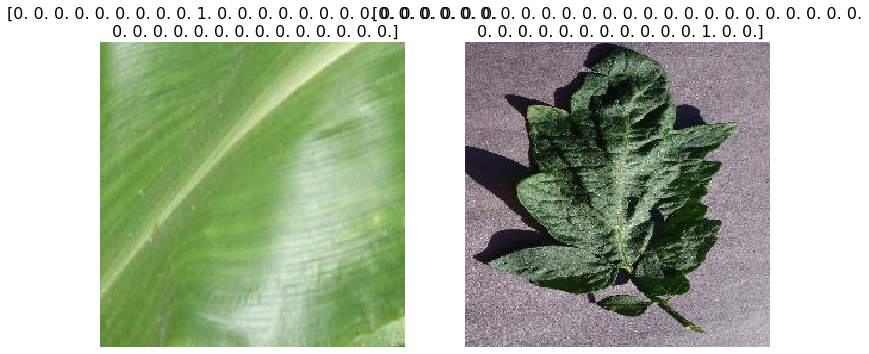

In [20]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)